In [78]:
# ------------------------------- Importações ------------------------------- #

In [79]:
#importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [80]:
#importando e lendo o arquivo
df = pd.read_csv('creditcard_2023.csv')

In [81]:
# ---------------------- Análise Exploratória dos Dados -------------------------- #

In [82]:
#lendo os nomes das colunas do DataFrame
print(df.columns)

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [83]:
#lendo a quantidade de linhas e colunas do DataFrame
print(df.shape)

(568630, 31)


In [84]:
#lendo as primeiras oito linhas do DataFrame
df.head(8)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0


In [85]:
#verificando se existem valores faltantes
print(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)


<ipython-input-86-8e4daa72e38c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=df, edgecolor='black', palette=colors)
<ipython-input-86-8e4daa72e38c>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Legit', 'Fraud'])


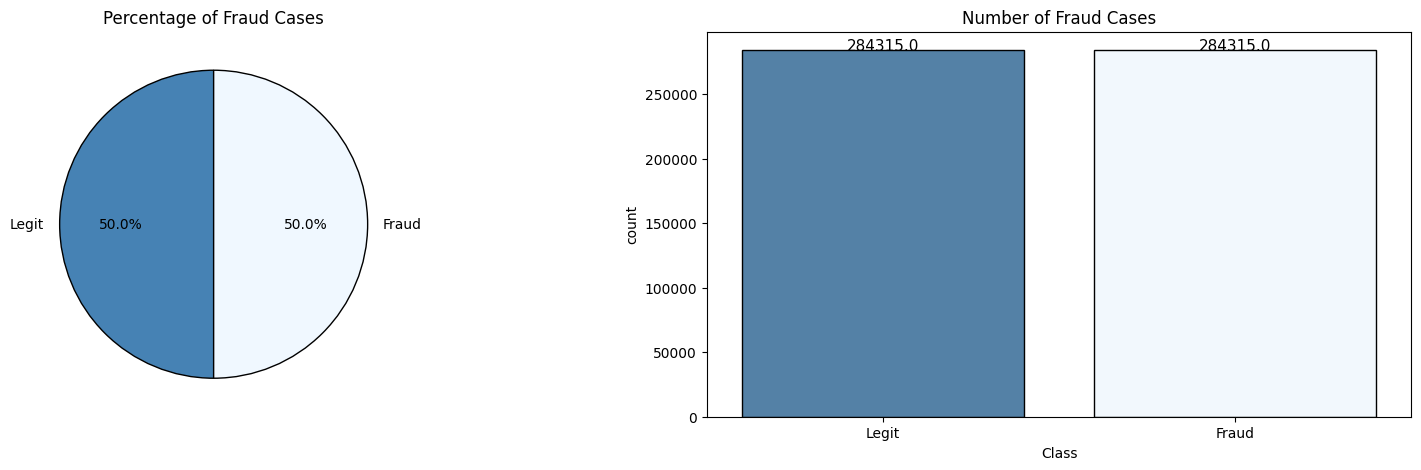

In [86]:
#criando váriaveis para fraude e legítimos
class_counts = df['Class'].value_counts(normalize=True) * 100
fraud, legit = class_counts[1], class_counts[0]
fraud_percentage = [legit, fraud]

#definindo cores para os gráficos
colors = ['steelblue', 'aliceblue']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# pie chart
plt.subplot(1, 2, 1)
plt.pie(fraud_percentage, labels=['Legit', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Percentage of Fraud Cases')

# countplot
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Class', data=df, edgecolor='black', palette=colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Legit', 'Fraud'])
plt.title('Number of Fraud Cases')

#mostrando os gráficos
plt.show()

In [87]:
# ----------------- Criação do Modelo - Regressão Logística --------------------- #

In [88]:
#divisão dos dados
X = df.drop(columns='Class', axis=1)  #Todas as colunas, menos 'Class'
Y = df['Class']

# 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
#treinando o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

#fazendo previsões com Test Data usando um limiar reduzido
limiar = 0.3  # Alterando o limiar para aumentar a sensibilidade do modelo
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= limiar).astype(int)

In [90]:
# ---------------------- Avaliação do Modelo ---------------------- #

Acurácia: 0.9983
Precisão: 0.9979
Recall: 0.9986
F1-score: 0.9983
Matriz de Confusão:


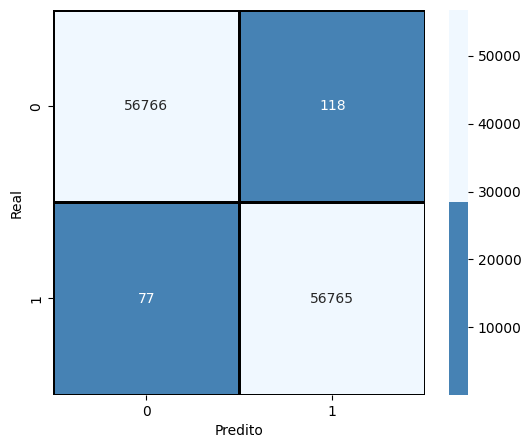

In [91]:
# Calculando métricas adicionais
accuracy =  accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

# Exibindo os resultados
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("Matriz de Confusão:")
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette(colors), linewidths=1, linecolor='black')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
